## Tensorflow for Regression

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import optimizers
from keras import losses
from keras import activations
from keras import callbacks
from keras import utils
from keras import metrics


from keras import datasets

keras.datasets.mnist.load_data()

2025-02-07 10:01:32.430637: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738897292.484353   17656 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738897292.499881   17656 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-07 10:01:32.557444: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [2]:
import tensorflow as tf

# This prints a dictionary of build configuration info.
build_info = tf.sysconfig.get_build_info()
print("Compiled cuDNN version:", build_info.get("cudnn_version", "unknown"))


Compiled cuDNN version: 9


I0000 00:00:1738897306.627376   17656 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2795 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


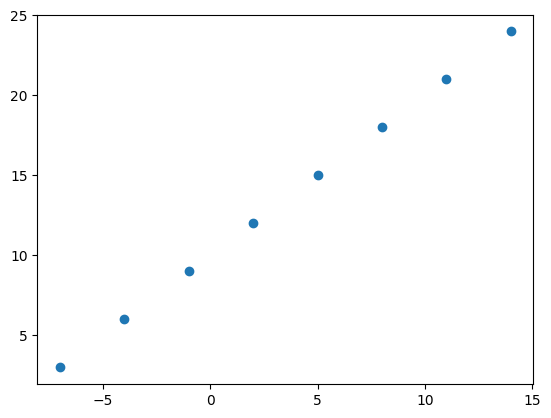

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [4]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [5]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

### Modeling

In [6]:
import tensorflow as tf

# This prints a dictionary of build configuration info.
build_info = tf.sysconfig.get_build_info()
print("Compiled cuDNN version:", build_info.get("cudnn_version", "unknown"))


Compiled cuDNN version: 9


In [7]:
# Set random seed
tf.random.set_seed(42)

# Creating model using Sequential API
model = keras.Sequential([
    layers.Dense(1, activation=activations.sigmoid),
    
])

# compile the model
model.compile(loss=losses.sparse_categorical_crossentropy,
              optimizer=optimizers.Adam(learning_rate=0.1),
              metrics=[metrics.mean_squared_error,
                       ])

# Early stopping
early_stop =  callbacks.EarlyStopping(min_delta=5, 
                                      patience=20)

# learning_rate scheduler
lr_scheduler = callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# traverse a set of learning rate values starting from 1e-4 increasing by 10**(epoch/20) every epoch


# Fit the model
history =  model.fit(tf.expand_dims(X, axis=1),
                    y, 
                    epochs=50, 
                    callbacks=lr_scheduler,
                    verbose=True)

Epoch 1/50


I0000 00:00:1738897310.177842   17730 service.cc:148] XLA service 0x7b6978007bb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738897310.177905   17730 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-02-07 10:01:50.222883: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738897310.380766   17730 cuda_dnn.cc:529] Loaded cuDNN version 90700


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: nan - mean_squared_error: 225.5698 - learning_rate: 1.0000e-04
Epoch 2/50


I0000 00:00:1738897311.079068   17730 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - loss: nan - mean_squared_error: nan - learning_rate: 1.1220e-04
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - loss: nan - mean_squared_error: nan - learning_rate: 1.2589e-04
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - loss: nan - mean_squared_error: nan - learning_rate: 1.4125e-04
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - loss: nan - mean_squared_error: nan - learning_rate: 1.5849e-04
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: nan - mean_squared_error: nan - learning_rate: 1.7783e-04
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: nan - mean_squared_error: nan - learning_rate: 1.9953e-04
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: nan - mean_squared_error: nan - learning_rate: 2.2387e-04
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: nan - mean_squared_error: nan - learning_rate: 2.5119e-04
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: nan - mean_squared_error

In [8]:
import pandas as pd
pd.DataFrame(history.history).plot()

ModuleNotFoundError: No module named 'pandas'

In [ ]:
model

In [ ]:
model.predict(np.array([17.0]))

### *Make bigger dataset*

In [ ]:
X = np.arange(-100, 100, 4)
X

In [ ]:
# make label for training dataset
y = np.arange(-90, 110, 4)
y

In [95]:
y = X + 10

In [ ]:
X_train = X[:40]            # first 40 examples (80% of data)
y_train = y[:40]            # 

X_test = X[40:]         # last 10 examples (20% of data)
y_test = y[40:]         

len(X_train), len(X_test)

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [ ]:
# set the random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# Compile model
model.compile(loss=losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[metrics.mean_absolute_error,
                       metrics.mean_squared_error])

history = model.fit(tf.expand_dims(X_train, axis=1), 
                    y_train, 
                    epochs=50, 
                    verbose=True)

In [ ]:
model.summary()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

In [102]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_pred):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend();



In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

In [ ]:
model.evaluate(X_test, y_test)

### *save model*

In [ ]:
model.save("model/best_model.h5")

### *Load model*

In [ ]:
load_saved_model = tf.keras.models.load_model("model/best_model.h5")
load_saved_model.summary()

In [ ]:
y_pred = load_saved_model.predict(X_test)

In [ ]:
y_pred

### *neu project*

In [109]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance.head()

In [ ]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance, dtype=float)
insurance_one_hot.head() # view the converted columns

In [113]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
X.head()

In [115]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits

In [116]:
# set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

history = insurance_model.fit(X_train, y_train, epochs=100, verbose=False)


In [ ]:
insurance_model.evaluate(X_test, y_test)

In [118]:
# set random seed
tf.random.set_seed(16)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
    layers.Dense(100),
    layers.Dense(10),
    layers.Dense(1)
])

# compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit the model and save the history (We can plot this)
epochs = 500
history = insurance_model_2.fit(X_train, y_train,
                                epochs=epochs,
                                verbose=False)

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel("loss")
plt.ylabel("epochs")


In [ ]:
insurance_model_2.evaluate(X_test, y_test)

### *Preprocesisng*

In [121]:

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
pd.DataFrame(X_train_normal)


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=losses.mean_absolute_error,
                          optimizer=optimizers.Adam(),
                          metrics=[metrics.mean_squared_error])

# Fit the model for 200 epochs (same as insurance_model_2)
history = insurance_model_3.fit(X_train_normal, y_train, epochs=200) 

In [ ]:
insurance_model_3.evaluate(X_test_normal, y_test)

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
"love you"